## Importing and Reading the Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Reading the leads.csv data using 'read_csv'.
data = pd.read_csv("leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Analysing the Data

In [4]:
#Checking the shape of the lead dataframe
data.shape

(9240, 37)

In [5]:
#Checking the statistical aspects of the dataframe
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Checking the information of the each column such as Non-Null count and Datatype 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Our Analysis
- We could see there are some columns with null values.
- We should analyse those columns with less percentage of null values and impute the null values accordingly.
- We are decided to drop the columns with more than 35% null values.

# Data Cleaning

In [7]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
# Checking the name of the columns
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [9]:
# Checking the null percentage in the dataset
(data.isnull().sum()*100/len(data)).round(2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Converting the Select values to the null values 
- After our analysis we found that there are some columns with Select values which indicates that the customer didnt select any value for the particular variable. It is better to replace those Select values with null values.

In [10]:
#Replacing the Select value with null values
data = data.replace('Select',np.nan,regex=True)

In [11]:
# Checking the null percentage in the dataset
(data.isnull().sum()*100/len(data)).round(2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [12]:
# Checking the columns with less than 35 % null values
(data.isnull().sum()*100/len(data)<=35).sum()

27

### Our Analysis
- We are going to drop the columns with more than 35% null values
- There are 27 columns with null values less than 35%

In [13]:
# Retaining the columns with only less than 35% null values in the data
data = data.loc[:,data.isnull().sum()*100/len(data)<=35]
data.shape

(9240, 27)

In [14]:
# Checking the null values of the columns in percentage after dropping the columns with 35% null values
(data.isnull().sum()*100/len(data)).round(2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [15]:
# Checking the shape after dropping the columns
data.shape

(9240, 27)

### The Prospect ID and Lead Number both of them are unique identifier of the customers so it can be dropped.

In [16]:
# Dropping Prospect ID, Lead Number columns 
data.drop(["Prospect ID","Lead Number"], axis=1, inplace=True)

In [17]:
# Checking the shape after dropping the columns
data.shape

(9240, 25)

#### Based on our analysis we came to the conclusion that the following columns are not useful for analysis. These columns are for the Sales team and it is better to drop the following columns.
- Last Activity
- Last Notable Activity

In [18]:
# Dropping the Last Activity, Last Notable Activity columns
data.drop(["Last Activity","Last Notable Activity"], axis=1, inplace=True)

In [19]:
# Checking the shape after dropping the columns
data.shape

(9240, 23)

### Exploratory Data Analysis

- We should check whether the categorical variables have skewed values or not. If the column has skewed values we should drop them.
- We should treat the missing values based on the data type.
- We should check the outliers and treat them accordingly.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Country                                        6779 non-null   object 
 9   What is your current occupation                6550 

In [21]:
# Checking the value counts of Lead Origin column
data["Lead Origin"].value_counts(dropna=False)

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

### Our Analysis on Lead Origin column
- There is no skewed values
- There is no null values also.
- No further imputation is required.

In [22]:
# Checking the value counts of Lead Source column
data["Lead Source"].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
WeLearn                 1
NC_EDM                  1
welearnblog_Home        1
youtubechannel          1
testone                 1
blog                    1
Name: Lead Source, dtype: int64

### Our Analysis on Lead Source column
- There is no skewed values
- But there are some null values it has to be treated.
- Since it is a categorical column we can replace the null values with mode (most frequent value that is Google here).

In [23]:
# Checking the mode of the Lead Source column
data['Lead Source'].mode()[0]

'Google'

In [24]:
#Filling the null values in the Lead Source column with Google
data['Lead Source'] = data['Lead Source'].fillna(data['Lead Source'].mode()[0])

In [25]:
# Checking the value counts of Do Not Email column
data["Do Not Email"].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

### Our Analysis on Do Not Email column
- There is no null values to impute
- The values are highly skewed there are more than 90% with only one value No.
- It is better to drop this colum

In [26]:
#Dropping the Do No Email column
data.drop(['Do Not Email'],axis=1,inplace=True)

In [27]:
# Checking the value counts of Do Not Call column
data["Do Not Call"].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

### Our Analysis on Do Not Call column
- There is no null values to impute
- The values are highly skewed there are more than 99% with only one value No.
- It is better to drop this column.

In [28]:
#Dropping the Do No Call column
data.drop(['Do Not Call'],axis=1,inplace=True)

In [29]:
#Checking the null values in Total Visits
data["TotalVisits"].isnull().sum()

137

In [30]:
# Filling the null values with the median
data['TotalVisits'] = data['TotalVisits'].fillna(data['TotalVisits'].median())

In [31]:
#Checking the null values in Page Views Per Visit
data["Page Views Per Visit"].isnull().sum()

137

In [32]:
# Filling the null values with the median
data['Page Views Per Visit'] = data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].median())

In [33]:
# Checking the value counts of Country column
data['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Canada                     4
Germany                    4
Kuwait                     4
Nigeria                    4
South Africa               4
Sweden                     3
China                      2
Bangladesh                 2
Ghana                      2
Italy                      2
Netherlands                2
Belgium                    2
Asia/Pacific Region        2
Philippines                2
Uganda                     2
Indonesia                  1
Tanzania                   1
Russia                     1
Switzerland                1
Denmark                    1
Liberia       

### Our Analysis on Country column
- The column has null values first we will fill the null values with mode.

In [34]:
#Filling the null values with mode
data['Country']= data['Country'].fillna(data['Country'].mode()[0])

### Our Analysis on Country column after filling null values
- The values are highly skewed there are more than 96% with only one value India.
- It is better to drop Country column.

In [35]:
#Dropping the Country column
data.drop(['Country'],axis=1,inplace=True)

In [36]:
# Checking the value counts of What is your current occupation column
data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

### Our Analysis
- We could see there are more null values that must be treated.
- We are going to replace the null values with mode.

In [37]:
# Filling the null values with mode
data['What is your current occupation'] = data['What is your current occupation'].fillna(data['What is your current occupation'].mode()[0])

In [38]:
data['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [39]:
# Checking the value counts of What matters most to you in choosing a course column
data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

### Our Analysis in What matters most to you in choosing a course column
- We could see there are null values in the What matters most to you in choosing a course column
- We should impute the null values with the mode

In [40]:
# Filling the null values with mode
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].fillna(data['What matters most to you in choosing a course'].mode()[0])

In [41]:
# Checking the value counts of after filling the null values in the What matters most to you in choosing a course column
data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [42]:
# Checking the value counts of Search column
data['Search'].value_counts(dropna=False)

No     9226
Yes      14
Name: Search, dtype: int64

In [43]:
# Checking the value counts of Magazine column
data['Magazine'].value_counts(dropna=False)

No    9240
Name: Magazine, dtype: int64

In [44]:
# Checking the value counts of Newspaper Article column
data['Newspaper Article'].value_counts(dropna=False)

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [45]:
# Checking the value counts of X Education Forums column
data['X Education Forums'].value_counts(dropna=False)

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [46]:
# Checking the value counts of Digital Advertisement column
data['Newspaper'].value_counts(dropna=False)

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [47]:
# Checking the value counts of Digital Advertisement column
data['Digital Advertisement'].value_counts(dropna=False)

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [48]:
# Checking the value counts of Through Recommendations column
data['Through Recommendations'].value_counts(dropna=False)

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [49]:
# Checking the value counts of Receive More Updates About Our Courses column
data['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [50]:
# Checking the value counts of Update me on Supply Chain Content column
data['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [51]:
# Checking the value counts of Get updates on DM Content column
data['Get updates on DM Content'].value_counts(dropna=False)

No    9240
Name: Get updates on DM Content, dtype: int64

In [52]:
# Checking the value counts of I agree to pay the amount through cheque column
data['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

### Our Analysis
- Dropping the following columns since it has highly skewed values
    - What matters most to you in choosing a course
    - Search
    - Magazine
    - Newspaper Article
    - X Education Forums
    - Newspaper
    - Digital Advertisement
    - Through Recommendations
    - Receive More Updates About Our Courses
    - Update me on Supply Chain Content
    - Get updates on DM Content
    - I agree to pay the amount through cheque

In [53]:
# Dropping the above mentioned columns due to data imbalance
data.drop(['What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis = 1, inplace= True)

In [54]:
data['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

### Our Analysis
- No action is required for the A free copy of Mastering The Interview column.

In [55]:
data.isnull().sum()

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
What is your current occupation           0
A free copy of Mastering The Interview    0
dtype: int64

## All the null values are treated successfully

In [56]:
# Checking the shape of the data
data.shape

(9240, 8)

In [57]:
# Checking the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   What is your current occupation         9240 non-null   object 
 7   A free copy of Mastering The Interview  9240 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 577.6+ KB


## Checking for outliers 
- We have to check the outliers for all the variables and treat them wisely.
- The best way to check the outliers of the numerical variable is box plot.

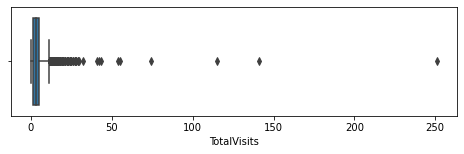

In [58]:
#Checking the Outliers in the TotalVisits column
plt.figure(figsize=[8,2])
sns.boxplot(data['TotalVisits'])
plt.show()

We could see there are outliers in the TotalVisits column lets treat them by taking the 99 percentile and 1 percentile

In [59]:
data = data[data['TotalVisits']<= np.nanpercentile(data['TotalVisits'],99)]
data = data[data['TotalVisits']>= np.nanpercentile(data['TotalVisits'],1)]

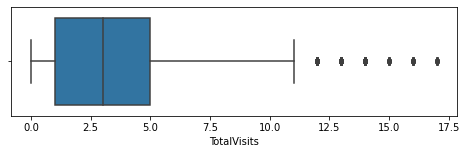

In [60]:
#Checking the TotalVisits column after outlier treatment
plt.figure(figsize=[8,2])
sns.boxplot(data['TotalVisits'])
plt.show()

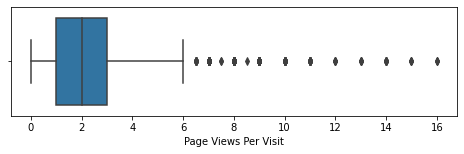

In [61]:
#Checking the Outliers in the Page Views Per Visit column
plt.figure(figsize=[8,2])
sns.boxplot(data['Page Views Per Visit'])
plt.show()

We could see there are outliers in the `Page Views Per Visit` column, lets treat them by taking the 99 percentile and 1 percentile

In [62]:
data = data[data['Page Views Per Visit']<np.nanpercentile(data['Page Views Per Visit'],99)]
data = data[data['Page Views Per Visit']>np.nanpercentile(data['Page Views Per Visit'],1)]

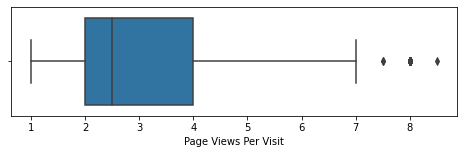

In [63]:
#Checking the Page Views Per Visit column after outlier treatment
plt.figure(figsize=[8,2])
sns.boxplot(data['Page Views Per Visit'])
plt.show()

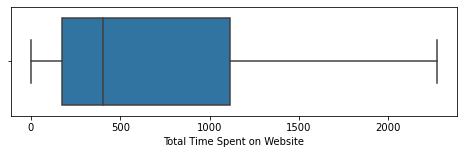

In [64]:
#Checking the Outliers in the Page Views Per Visit column
plt.figure(figsize=[8,2])
sns.boxplot(data['Total Time Spent on Website'])
plt.show()

There is no outlier present in the column `Total Time Spent on Website`.

## Univariate Analysis

#### Numerical Variables

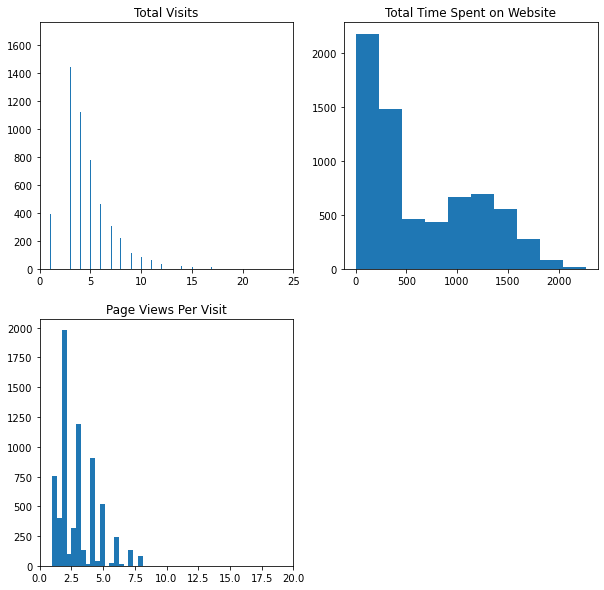

In [65]:
# Plotting Histogram for the numerical variables
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(data['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(data['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(data['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Insights
- Total Visits - The most of the customers have made less than 5 visits on the website.
- Total Time Spent on Website - The most of the customers spent (0 - 500) seconds on the website.
- Page Views Per Visit - The most of the customers visit 1 to 5 pages per visit.

### Categorical Variables

<AxesSubplot:xlabel='A free copy of Mastering The Interview', ylabel='count'>

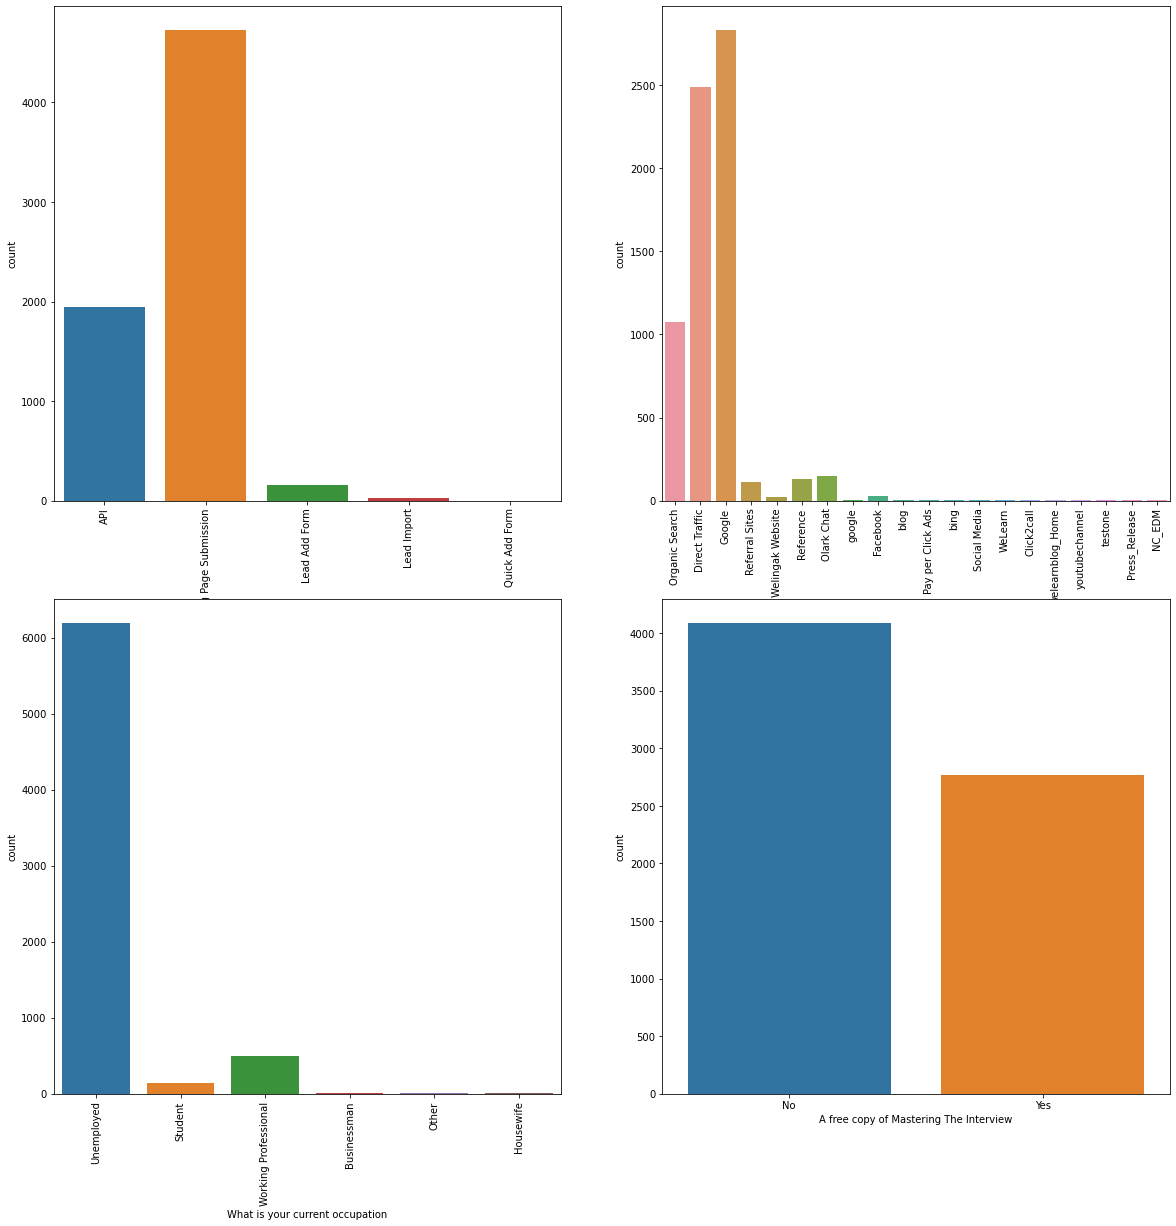

In [66]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
sns.countplot(data['Lead Origin']).tick_params(axis='x', rotation = 90)


plt.subplot(2,2,2)
sns.countplot(data['Lead Source']).tick_params(axis='x', rotation = 90)


plt.subplot(2,2,3)
sns.countplot(data['What is your current occupation']).tick_params(axis='x', rotation = 90)


plt.subplot(2,2,4)
sns.countplot(data['A free copy of Mastering The Interview'])

### Insights
- Lead Origin - Most of the customers lead origin is API or Landing Page Submission
- Lead Source - Most of the customers became lead through Google only. In order to increase leads, the company can advertise more in the google advertisement.
- What is your current occupation - Unemployed - Customers who are unemployed are likely to became a lead. This is obvious that the person who is unemployed wants to get a job, so they are interested in the online education courses. It is followed by working professional, because they wanted to grow in their career or they want to switch their career so they are interested in the online education courses.
- A free copy of Mastering The Interview - Most of the customers say no this free copy of mastering interview.

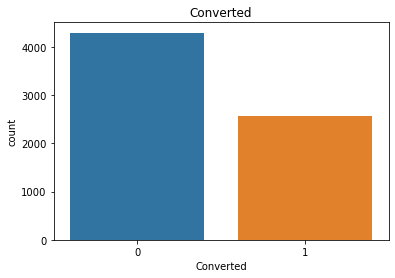

In [67]:
#Checking the data imbalance based on target variable
sns.countplot(data['Converted'])
plt.title('Converted')
plt.show()

### Insights
- The data is not a imbalance data. We can proceed our analysis.

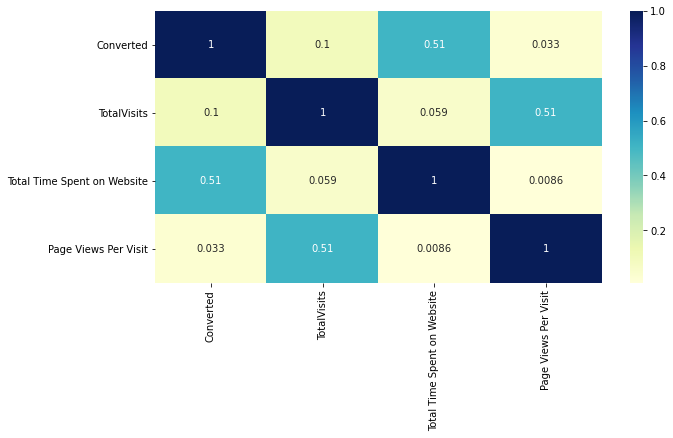

In [68]:
# Checking correlation coefficients to check which variables are higly correlated 
plt.figure(figsize = (10, 5))
sns.heatmap(data.corr(),annot = True, cmap="YlGnBu")
plt.show()

### Insights
- We could see there is a good relationship between target variable converted and Total Time Spent on the Website.

#### Target Variable vs Categorical Variable

Text(0.5, 1.0, 'Lead Origin vs Converted')

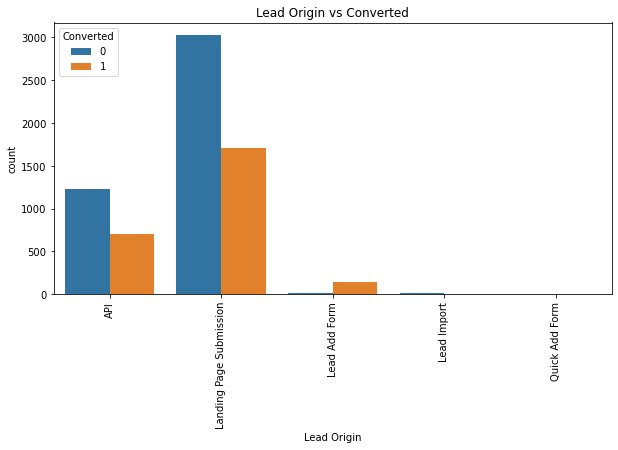

In [69]:
plt.figure(figsize = (10,5))

sns.countplot(x='Lead Origin', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin vs Converted')

### Insights
- More leads were converted for the API and Landing Page Submissions Lead origin. The more leads are from these category that could be one of the reason.

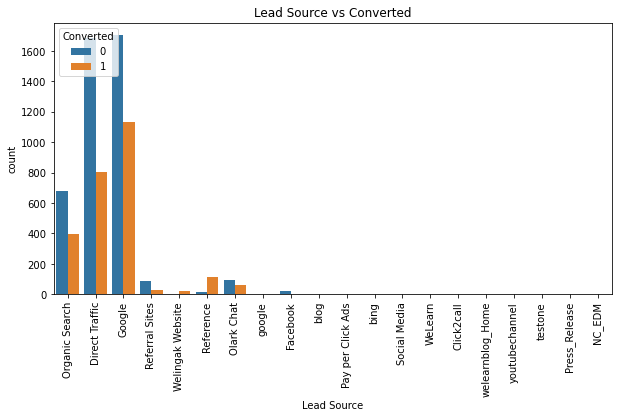

In [70]:
plt.figure(figsize = (10,5))
sns.countplot(x='Lead Source', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('Lead Source vs Converted')
plt.show()

### Insights
- More leads are converted for the Google, Direct Traffic, and Olark Chat lead sources compared to not converted. So the sales team should concentrate on these sources, because their conversion rate is high.
- Leads from the Reference category are less likely to get converted, because their conversion rate is too low. So, sales team should not concentrate more on leads from Reference source.

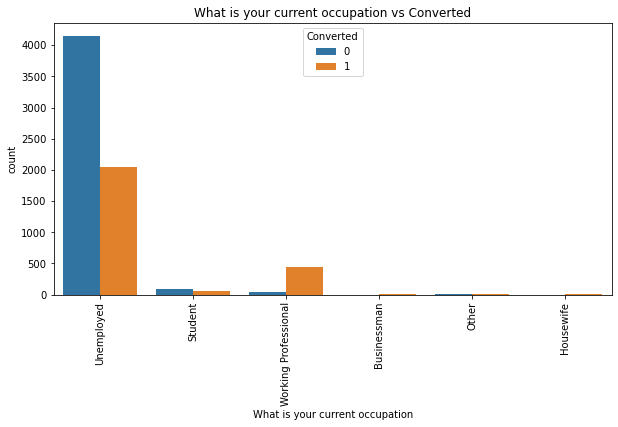

In [71]:
plt.figure(figsize = (10,5))
sns.countplot(x='What is your current occupation', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation vs Converted')
plt.show()

### Insights
- Working Professionals lead conversion rate is too high. So the sales team should concentrate working professional. It is because working professional is doing course for their career growth. In some companies it is mandatory for all the employees to upscale themselves inorder to sustain in the job.

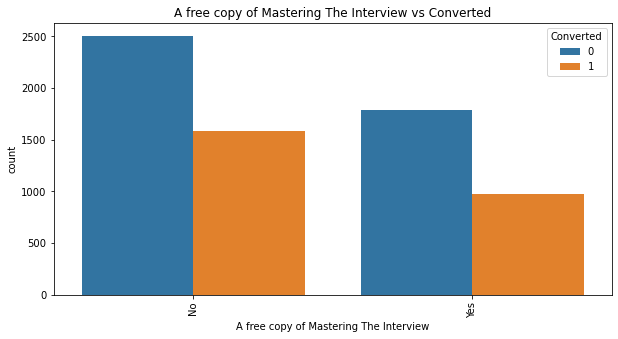

In [72]:
plt.figure(figsize = (10,5))
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= data).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview vs Converted')
plt.show()

### Insights
- We couldnt find any pattern in the yes and no of the A free copy of Mastering The Interview vs Converted column based on Converted variable

## Data Preparation

#### Converting binary varibles Yes or No values to 1/0

In [73]:
data.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [74]:
bin_var = ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the bin_var
data[bin_var] = data[bin_var].apply(binary_map)

In [75]:
data.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview
1,API,Organic Search,0,5.0,674,2.5,Unemployed,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Student,1
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unemployed,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Unemployed,0
6,Landing Page Submission,Google,1,2.0,1640,2.0,Unemployed,0


#### For categorical variables with multiple levels, we have to create dummy features - One Hot Encoded

In [76]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(data[['Lead Origin','Lead Source','What is your current occupation']], drop_first=True)

# Adding the results to the master dataframe
data = pd.concat([data, dummy], axis=1)

In [77]:
# We have created dummies for the below variables, so we can drop them
data = data.drop(['Lead Origin','Lead Source','What is your current occupation'], 1)

In [78]:
data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,...,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1,2.0,1640,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [79]:
data.columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       '

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6856 entries, 1 to 9239
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             6856 non-null   int64  
 1   TotalVisits                                           6856 non-null   float64
 2   Total Time Spent on Website                           6856 non-null   int64  
 3   Page Views Per Visit                                  6856 non-null   float64
 4   A free copy of Mastering The Interview                6856 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6856 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6856 non-null   uint8  
 7   Lead Origin_Lead Import                               6856 non-null   uint8  
 8   Lead Origin_Quick Add Form                            6856

### Test-Train Split

In [81]:
#Importing the train test split from the sklearn.model_selection library
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = data['Converted']
y.head()

1    0
2    1
3    0
4    1
6    1
Name: Converted, dtype: int64

In [82]:
#Dropping the target variable and assigning the rest of variables to the X
X=data.drop('Converted', axis=1)

In [83]:
# Splitting the dataset into 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [84]:
#Importing the StandardScaler from the sklearn.preprocessing library

from sklearn.preprocessing import StandardScaler

- Scaling is not required for dummy variables since it has only two values 0 and 1.
- Scaling is required only for the numerical variables

In [85]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
4091,-0.425587,1.395551,0.046358,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
55,-0.811454,-1.149415,-0.617281,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,0.732013,-0.628602,2.037274,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5821,-0.811454,-0.846531,-0.617281,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9200,0.346146,-0.602746,1.373636,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Feature Selection Using RFE

In [86]:
#Importing logistic Regression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
# Importing RFE from sklearn.feature_selection
from sklearn.feature_selection import RFE

In [87]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [88]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 17),
 ('A free copy of Mastering The Interview', False, 15),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 8),
 ('Lead Origin_Quick Add Form', False, 16),
 ('Lead Source_Direct Traffic', False, 9),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_NC_EDM', False, 18),
 ('Lead Source_Olark Chat', False, 13),
 ('Lead Source_Organic Search', False, 12),
 ('Lead Source_Pay per Click Ads', False, 11),
 ('Lead Source_Press_Release', False, 5),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 10),
 ('Lead Source_WeLearn', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', True, 1),
 ('Lead Source_blog', False, 2),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 6),


In [89]:
# Assigning all the columns selected by RFE to the variable 'col'
col = X_train.columns[rfe.support_]

In [90]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [91]:
#Importing the stats model library
import statsmodels.api as sm

### Model 1

In [92]:
#Adding the constant
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4799
Model:                            GLM   Df Residuals:                     4783
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2334.0
Date:                Sun, 16 May 2021   Deviance:                       4668.1
Time:                        21:39:11   Pearson chi2:                 4.99e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3037      1.410     -0.924      0.355      -4.068       1.461
Total Time Spent on Website                              1.1119      0.038     29.235      0.000       1.037       1.186
Lead Origin_Lead Add Form                                0.8541      0.828      1.031      0.302      -0.769       2.477
Lead Source_Facebook                                    -0.6594      0.644     -1.023      0.306      -1.922       0.604
Lead Source_Google                                       0.3366      0.074      4.561      0.000       0.192       0.481
Lead Source_Reference                                    1.4093      0.926      1.522      0.128      -0.406       3.224
Lead Source_Referral Sites                              -0.5265      0.339     -1.553      0.120      -1.191       0.138
Lead Source_WeLearn                                     23.4193   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                            23.2711    1.8e+04      0.001      0.999   -3.53e+04    3.54e+04
Lead Source_bing                                         0.7587      1.227      0.618      0.536      -1.646       3.164
Lead Source_google                                     -22.9839    4.3e+04     -0.001      1.000   -8.42e+04    8.42e+04
What is your current occupation_Housewife               24.4701   2.81e+04      0.001      0.999    -5.5e+04     5.5e+04
What is your current occupation_Other                   -0.2048      1.572     -0.130      0.896      -3.287       2.877
What is your current occupation_Student                  0.6377      1.430      0.446      0.656      -2.165       3.440
What is your current occupation_Unemployed               0.3217      1.411      0.228      0.820      -2.443       3.087
What is your current occupation_Working Professional     3.2224      1.424      2.264      0.024       0.432       6.013
========================================================================================================================
"""

### The p value of the Lead Source_WeLearn variable is too high so we have to drop that column.

In [93]:
#dropping the column with high p value
col = col.drop('Lead Source_WeLearn',1)

### Model 2

In [94]:
#Adding the constant
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4799
Model:                            GLM   Df Residuals:                     4784
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2334.7
Date:                Sun, 16 May 2021   Deviance:                       4669.3
Time:                        21:39:11   Pearson chi2:                 4.99e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3038      1.411     -0.924      0.355      -4.069       1.461
Total Time Spent on Website                              1.1125      0.038     29.249      0.000       1.038       1.187
Lead Origin_Lead Add Form                                0.8536      0.828      1.031      0.303      -0.770       2.477
Lead Source_Facebook                                    -0.6607      0.644     -1.025      0.305      -1.924       0.602
Lead Source_Google                                       0.3355      0.074      4.546      0.000       0.191       0.480
Lead Source_Reference                                    1.4087      0.926      1.521      0.128      -0.407       3.224
Lead Source_Referral Sites                              -0.5277      0.339     -1.556      0.120      -1.192       0.137
Lead Source_Welingak Website                            23.2704    1.8e+04      0.001      0.999   -3.53e+04    3.54e+04
Lead Source_bing                                         0.7578      1.227      0.618      0.537      -1.647       3.163
Lead Source_google                                     -22.9853    4.3e+04     -0.001      1.000   -8.42e+04    8.42e+04
What is your current occupation_Housewife               24.4707   2.81e+04      0.001      0.999    -5.5e+04     5.5e+04
What is your current occupation_Other                   -0.2048      1.573     -0.130      0.896      -3.287       2.877
What is your current occupation_Student                  0.6381      1.430      0.446      0.655      -2.165       3.441
What is your current occupation_Unemployed               0.3230      1.411      0.229      0.819      -2.443       3.089
What is your current occupation_Working Professional     3.2231      1.424      2.264      0.024       0.432       6.014
========================================================================================================================
"""

### The p value of the Lead Source_google variable is too high so we have to drop that column.

In [95]:
#dropping the column with high p value
col = col.drop('Lead Source_google',1)

### Model 3

In [96]:
#Adding the constant
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4799
Model:                            GLM   Df Residuals:                     4785
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2336.1
Date:                Sun, 16 May 2021   Deviance:                       4672.2
Time:                        21:39:12   Pearson chi2:                 5.00e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3040      1.410     -0.925      0.355      -4.068       1.460
Total Time Spent on Website                              1.1119      0.038     29.242      0.000       1.037       1.186
Lead Origin_Lead Add Form                                0.8548      0.828      1.032      0.302      -0.768       2.478
Lead Source_Facebook                                    -0.6578      0.644     -1.021      0.307      -1.921       0.605
Lead Source_Google                                       0.3382      0.074      4.584      0.000       0.194       0.483
Lead Source_Reference                                    1.4102      0.926      1.523      0.128      -0.405       3.225
Lead Source_Referral Sites                              -0.5249      0.339     -1.548      0.122      -1.189       0.140
Lead Source_Welingak Website                            23.2721    1.8e+04      0.001      0.999   -3.53e+04    3.54e+04
Lead Source_bing                                         0.7603      1.227      0.620      0.536      -1.645       3.165
What is your current occupation_Housewife               24.4700   2.81e+04      0.001      0.999    -5.5e+04     5.5e+04
What is your current occupation_Other                   -0.2051      1.572     -0.130      0.896      -3.287       2.876
What is your current occupation_Student                  0.6374      1.430      0.446      0.656      -2.165       3.440
What is your current occupation_Unemployed               0.3204      1.411      0.227      0.820      -2.445       3.085
What is your current occupation_Working Professional     3.2221      1.423      2.263      0.024       0.432       6.012
========================================================================================================================
"""

### The p value of the Lead Source_Welingak Website variable is too high so we have to drop that column.

In [97]:
#dropping the column with high p value
col = col.drop('Lead Source_Welingak Website',1)

### Model 4

In [98]:
#Adding the constant
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4799
Model:                            GLM   Df Residuals:                     4786
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2340.3
Date:                Sun, 16 May 2021   Deviance:                       4680.5
Time:                        21:39:12   Pearson chi2:                 5.01e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3027      1.411     -0.923      0.356      -4.068       1.463
Total Time Spent on Website                              1.1122      0.038     29.258      0.000       1.038       1.187
Lead Origin_Lead Add Form                                2.5916      0.644      4.027      0.000       1.330       3.853
Lead Source_Facebook                                    -0.6614      0.644     -1.026      0.305      -1.924       0.602
Lead Source_Google                                       0.3306      0.074      4.483      0.000       0.186       0.475
Lead Source_Reference                                   -0.3301      0.764     -0.432      0.666      -1.828       1.168
Lead Source_Referral Sites                              -0.5284      0.339     -1.559      0.119      -1.193       0.136
Lead Source_bing                                         0.7569      1.227      0.617      0.537      -1.648       3.162
What is your current occupation_Housewife               23.4702    1.7e+04      0.001      0.999   -3.33e+04    3.34e+04
What is your current occupation_Other                   -0.2039      1.573     -0.130      0.897      -3.286       2.879
What is your current occupation_Student                  0.6388      1.431      0.447      0.655      -2.165       3.443
What is your current occupation_Unemployed               0.3226      1.411      0.229      0.819      -2.444       3.089
What is your current occupation_Working Professional     3.2239      1.424      2.264      0.024       0.433       6.015
========================================================================================================================
"""

### The p value of the What is your current occupation_Housewife is too high so we have to drop that column.

In [99]:
#dropping the column with high p value
col = col.drop('What is your current occupation_Housewife',1)

### Model 5

In [100]:
#Adding the constant
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4799
Model:                            GLM   Df Residuals:                     4787
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2343.2
Date:                Sun, 16 May 2021   Deviance:                       4686.3
Time:                        21:39:12   Pearson chi2:                 5.02e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9093      0.893      1.018      0.309      -0.842       2.660
Total Time Spent on Website                              1.1113      0.038     29.253      0.000       1.037       1.186
Lead Origin_Lead Add Form                                2.5914      0.644      4.027      0.000       1.330       3.853
Lead Source_Facebook                                    -0.6613      0.644     -1.027      0.305      -1.924       0.601
Lead Source_Google                                       0.3298      0.074      4.475      0.000       0.185       0.474
Lead Source_Reference                                   -0.3106      0.764     -0.407      0.684      -1.807       1.186
Lead Source_Referral Sites                              -0.5285      0.339     -1.559      0.119      -1.193       0.136
Lead Source_bing                                         0.7561      1.227      0.616      0.538      -1.649       3.161
What is your current occupation_Other                   -2.4147      1.133     -2.132      0.033      -4.634      -0.195
What is your current occupation_Student                 -1.5728      0.924     -1.703      0.089      -3.384       0.238
What is your current occupation_Unemployed              -1.8890      0.894     -2.114      0.035      -3.641      -0.137
What is your current occupation_Working Professional     1.0117      0.913      1.108      0.268      -0.778       2.802
========================================================================================================================
"""

### The p value of the Lead Source_Reference is too high so we have to drop that column.

In [101]:
#dropping the column with high p value
col = col.drop('Lead Source_Reference',1)

### Model 6

In [102]:
#Adding the constant
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4799
Model:                            GLM   Df Residuals:                     4788
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2343.2
Date:                Sun, 16 May 2021   Deviance:                       4686.5
Time:                        21:39:13   Pearson chi2:                 5.05e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9014      0.895      1.008      0.314      -0.852       2.655
Total Time Spent on Website                              1.1113      0.038     29.252      0.000       1.037       1.186
Lead Origin_Lead Add Form                                2.3780      0.349      6.808      0.000       1.693       3.063
Lead Source_Facebook                                    -0.6611      0.644     -1.026      0.305      -1.924       0.602
Lead Source_Google                                       0.3305      0.074      4.487      0.000       0.186       0.475
Lead Source_Referral Sites                              -0.5282      0.339     -1.558      0.119      -1.193       0.136
Lead Source_bing                                         0.7564      1.227      0.616      0.538      -1.648       3.161
What is your current occupation_Other                   -2.4071      1.133     -2.124      0.034      -4.629      -0.186
What is your current occupation_Student                 -1.5660      0.925     -1.693      0.090      -3.379       0.247
What is your current occupation_Unemployed              -1.8814      0.895     -2.102      0.036      -3.635      -0.127
What is your current occupation_Working Professional     1.0181      0.915      1.113      0.266      -0.774       2.811
========================================================================================================================
"""

### The p value of the Lead Source_bing is too high so we have to drop that column.

In [103]:
#dropping the column with high p value
col = col.drop('Lead Source_bing',1)

### Model 7

In [104]:
#Adding the constant
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4799
Model:                            GLM   Df Residuals:                     4789
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2343.4
Date:                Sun, 16 May 2021   Deviance:                       4686.8
Time:                        21:39:13   Pearson chi2:                 5.04e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.9018      0.894      1.008      0.313      -0.851       2.655
Total Time Spent on Website                              1.1109      0.038     29.250      0.000       1.036       1.185
Lead Origin_Lead Add Form                                2.3770      0.349      6.805      0.000       1.692       3.062
Lead Source_Facebook                                    -0.6620      0.644     -1.028      0.304      -1.925       0.601
Lead Source_Google                                       0.3294      0.074      4.474      0.000       0.185       0.474
Lead Source_Referral Sites                              -0.5293      0.339     -1.562      0.118      -1.193       0.135
What is your current occupation_Other                   -2.4067      1.133     -2.124      0.034      -4.628      -0.185
What is your current occupation_Student                 -1.5659      0.925     -1.693      0.090      -3.379       0.247
What is your current occupation_Unemployed              -1.8806      0.895     -2.102      0.036      -3.634      -0.127
What is your current occupation_Working Professional     1.0181      0.914      1.113      0.266      -0.774       2.810
========================================================================================================================
"""

### The p value of the Lead Source_Facebook is too high so we have to drop that column.

In [105]:
#dropping the column with high p value
col = col.drop('Lead Source_Facebook',1)

### Model 8

In [106]:
#Adding the constant
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4799
Model:                            GLM   Df Residuals:                     4790
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2344.0
Date:                Sun, 16 May 2021   Deviance:                       4688.0
Time:                        21:39:14   Pearson chi2:                 5.05e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8999      0.894      1.006      0.314      -0.853       2.653
Total Time Spent on Website                              1.1107      0.038     29.252      0.000       1.036       1.185
Lead Origin_Lead Add Form                                2.3810      0.349      6.817      0.000       1.696       3.066
Lead Source_Google                                       0.3338      0.074      4.541      0.000       0.190       0.478
Lead Source_Referral Sites                              -0.5248      0.339     -1.549      0.121      -1.189       0.139
What is your current occupation_Other                   -2.4062      1.133     -2.123      0.034      -4.628      -0.185
What is your current occupation_Student                 -1.5711      0.925     -1.699      0.089      -3.384       0.242
What is your current occupation_Unemployed              -1.8832      0.895     -2.105      0.035      -3.637      -0.129
What is your current occupation_Working Professional     1.0181      0.914      1.113      0.266      -0.774       2.810
========================================================================================================================
"""

### The p value of the What is your current occupation_Working Professional is too high so we have to drop that column.

In [107]:
#dropping the column with high p value
col = col.drop('What is your current occupation_Working Professional',1)

### Model 9

In [108]:
#Adding the constant
X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4799
Model:                            GLM   Df Residuals:                     4791
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2344.5
Date:                Sun, 16 May 2021   Deviance:                       4689.1
Time:                        21:39:14   Pearson chi2:                 5.03e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.8815      0.190      9.891      0.000       1.509       2.254
Total Time Spent on Website                    1.1108      0.038     29.256      0.000       1.036       1.185
Lead Origin_Lead Add Form                      2.3749      0.349      6.796      0.000       1.690       3.060
Lead Source_Google                             0.3340      0.074      4.543      0.000       0.190       0.478
Lead Source_Referral Sites                    -0.5231      0.339     -1.545      0.122      -1.187       0.140
What is your current occupation_Other         -3.3880      0.722     -4.695      0.000      -4.802      -1.974
What is your current occupation_Student       -2.5527      0.302     -8.441      0.000      -3.145      -1.960
What is your current occupation_Unemployed    -2.8648      0.192    -14.920      0.000      -3.241      -2.488
==============================================================================================================
"""

### The p value of the Lead Source_Referral Sites is too high so we have to drop that column.

In [109]:
#dropping the column with high p value
col = col.drop('Lead Source_Referral Sites',1)

### Model 10

In [110]:
#Adding the constant
X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4799
Model:                            GLM   Df Residuals:                     4792
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2345.8
Date:                Sun, 16 May 2021   Deviance:                       4691.6
Time:                        21:39:14   Pearson chi2:                 5.03e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.8701      0.190      9.834      0.000       1.497       2.243
Total Time Spent on Website                    1.1109      0.038     29.262      0.000       1.037       1.185
Lead Origin_Lead Add Form                      2.3864      0.349      6.831      0.000       1.702       3.071
Lead Source_Google                             0.3464      0.073      4.737      0.000       0.203       0.490
What is your current occupation_Other         -3.3811      0.722     -4.683      0.000      -4.796      -1.966
What is your current occupation_Student       -2.5459      0.302     -8.417      0.000      -3.139      -1.953
What is your current occupation_Unemployed    -2.8661      0.192    -14.918      0.000      -3.243      -2.490
==============================================================================================================
"""

#### All the pvalues are under the threshold so we have to check the Variance Inflation Factor to see if there is any correlation between the variables

In [111]:
# Importing 'variance_inflation_factor' from the statsmodels.stats.outliers_influence 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [112]:
# Creating a dataframe called VIF that contains the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,What is your current occupation_Unemployed,1.66
2,Lead Source_Google,1.65
1,Lead Origin_Lead Add Form,1.03
0,Total Time Spent on Website,1.02
4,What is your current occupation_Student,1.01
3,What is your current occupation_Other,1.00


#### There is no high correlation between any variables, so all the VIF values are low. It is not required to drop any variables.

In [113]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4091    0.711105
55      0.093389
801     0.206210
5821    0.169381
9200    0.159008
7004    0.118767
4555    0.553739
4814    0.216468
3891    0.246358
1400    0.729352
dtype: float64

In [114]:
#Reshaping the y_train_pred.values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.71110466, 0.0933893 , 0.20621037, 0.16938056, 0.15900776,
       0.11876663, 0.55373933, 0.21646782, 0.24635834, 0.72935214])

In [115]:
# Creating a Data frame with given Converted values and Probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.711105
1,0,0.093389
2,1,0.206210
3,0,0.169381
4,0,0.159008


#### Creating a new column called 'Predicted' based on Conversion_Prob. The value is 1 if Conversion_Prob > 0.5 else 0.

In [116]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.711105,1
1,0,0.093389,0
2,1,0.206210,0
3,0,0.169381,0
4,0,0.159008,0


### Model Evaluation

In [117]:
# Importing metrics from sklearn library
from sklearn import metrics

In [118]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2562,  441],
       [ 687, 1109]], dtype=int64)

In [119]:
# Checking the overall accuracy
round (metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted),2)

0.76

In [120]:
# Substituting the values of true positives, true negatives, false positives, false negatives
# true positives
TP = confusion[1,1] 
# true negatives
TN = confusion[0,0] 
# false positives
FP = confusion[0,1] 
# false negatives
FN = confusion[1,0] 

In [121]:
# Calculating the sensitivity
round(TP/float(TP+FN),2)

0.62

In [122]:
# Calculating the specificity
round(TN/float(TN+FP),2)

0.85

In [123]:
# Calculating the False Postive Rate - predicting conversion when customer does not have convert
# Lesser the False Positive Rate the better the model is
round(FP/ float(TN+FP),2)

0.15

In [124]:
# Positive predictive value - predicting the converted customers correctly.
# Ideally this has to be more for better model.
round(TP / float(TP+FP),2)

0.72

In [125]:
# Negative predictive value - predicting the not converted customers correctly
# Ideally this has to be more for better model.
round(TN / float(TN+FN),2)

0.79

### Our Analysis
- If we take 0.5 as a cutoff we got the following metrics
    - Accuracy - 0.76
    - Sensitivity - 0.62
    - Specificity - 0.85
    - False Postive Rate - 0.15
    - Positive predictive value - 0.72
    - Negative predictive value - 0.79
- This is not the ideal cut off. We have to find out the optimum cut off.

### Plotting the ROC Curve
- The previous cut off of 0.5 was randomly selected. In order to select the optimum cut off we have to use ROC Curve.
- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [126]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [127]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

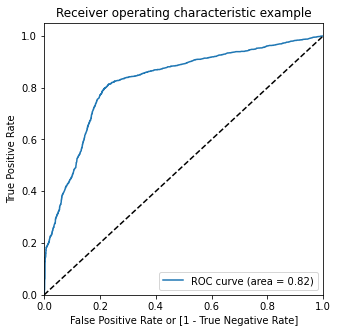

In [128]:
# Calling the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Finding Optimal Cutoff Point

##### Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [129]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.711105,1,1,1,1,1,1,1,1,1,0,0
1,0,0.093389,0,1,0,0,0,0,0,0,0,0,0
2,1,0.206210,0,1,1,1,0,0,0,0,0,0,0
3,0,0.169381,0,1,1,0,0,0,0,0,0,0,0
4,0,0.159008,0,1,1,0,0,0,0,0,0,0,0


In [130]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.374245,1.000000,0.000000
0.1,0.1,0.406960,0.987751,0.059607
0.2,0.2,0.718066,0.859688,0.633367
0.3,0.3,0.786414,0.806793,0.774226
0.4,0.4,0.785997,0.736080,0.815851
0.5,0.5,0.764951,0.617483,0.853147
0.6,0.6,0.739529,0.489978,0.888778
0.7,0.7,0.719733,0.351336,0.940060
0.8,0.8,0.696395,0.228285,0.976357
0.9,0.9,0.680975,0.157016,0.994339


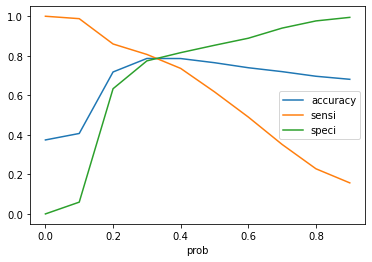

In [131]:
# Plotting the curve
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.32 is the optimum point to take it as a cutoff probability, because Accuracy, Sensitivity, and Specificity are high at that point

In [132]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.32 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.711105,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.093389,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.206210,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.169381,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.159008,0,1,1,0,0,0,0,0,0,0,0,0


In [133]:
#Creating a new column Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map(lambda x: round(x*100))

lead = y_train_pred_final[['Converted','Conversion_Prob','final_predicted','Lead_Score']]
lead.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
0,1,0.711105,1,71
1,0,0.093389,0,9
2,1,0.206210,0,21
3,0,0.169381,0,17
4,0,0.159008,0,16


In [134]:
# Checking the overall accuracy
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2)

0.79

In [135]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[2358,  645],
       [ 365, 1431]], dtype=int64)

In [136]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [137]:
# Calculating the sensitivity/Recall
round(TP/float(TP+FN),2)

0.8

In [138]:
# Calculating the specificity
round(TN/float(TN+FP),2)

0.79

In [139]:
# Calculating the False Postive Rate - predicting conversion when customer does not have convert
# Lesser the False Positive Rate the better the model is
round(FP/ float(TN+FP),2)

0.21

In [140]:
# Positive predictive value/Precision
# Positive predictive value - predicting the converted customers correctly.
# Ideally this has to be more for better model.
round(TP / float(TP+FP),2)

0.69

In [141]:
# Negative predictive value/
# Negative predictive value - predicting the not converted customers correctly
# Ideally this has to be more for better model.
round(TN / float(TN+FN),2)

0.87

In [142]:
#Importing precision_score, recall_score from the sklearn.metrics
from sklearn.metrics import precision_score, recall_score

In [143]:
round(precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted),2)

0.69

In [144]:
round(recall_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted),2)

0.8

### Our Analysis
- If we take 0.32 as a cutoff we got the following metrics
    - Accuracy - 0.79
    - Sensitivity/Recall - 0.80
    - Specificity - 0.79
    - False Postive Rate - 0.21
    - Positive predictive value/Precision - 0.69
    - Negative predictive value - 0.87
    - Precision_score - 0.69
    - Recall_score - 0.80

### Prediction on the Test Data Set

In [145]:
# Feature Scaling on Test Data Set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [146]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Google,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed
2714,1.0,1.569155,0,0,0,0,1
6013,1.0,-0.599053,0,0,0,0,1
1847,1.0,-0.744954,0,1,0,0,1
7150,1.0,0.185861,0,1,0,0,0
2561,1.0,-0.654458,0,1,0,0,1


In [147]:
X_test_sm.shape

(2057, 7)

In [148]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2714    0.678565
6013    0.159557
1847    0.185854
7150    0.918566
2561    0.201548
2695    0.275209
2094    0.437836
6966    0.109039
4600    0.092180
1973    0.938464
dtype: float64

In [149]:
# Coverting it to df which is an array
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
2714,0.678565
6013,0.159557
1847,0.185854
7150,0.918566
2561,0.201548


In [150]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [151]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [152]:
# Removing the index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [153]:
# Merging y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,2714,0.678565
1,0,6013,0.159557
2,0,1847,0.185854
3,1,7150,0.918566
4,0,2561,0.201548


In [154]:
# Renaming column the conversion probability column
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Prospect ID,Conversion_Prob
0,1,2714,0.678565
1,0,6013,0.159557
2,0,1847,0.185854
3,1,7150,0.918566
4,0,2561,0.201548


In [155]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Conversion_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,Lead_Score
0,2714,1,0.678565,68
1,6013,0,0.159557,16
2,1847,0,0.185854,19
3,7150,1,0.918566,92
4,2561,0,0.201548,20


#### A lead score is a score between 0 to 100 of the respective leads that is used by company to target the potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted. Based on the Prospect ID we can find out the respective lead.

In [156]:
# Making prediction using cut off 0.32
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.32 else 0)
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,Lead_Score,final_predicted
0,2714,1,0.678565,68,1
1,6013,0,0.159557,16,0
2,1847,0,0.185854,19,0
3,7150,1,0.918566,92,1
4,2561,0,0.201548,20,0


In [157]:
# Checking the overall accuracy
round(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted), 2)

0.81

In [158]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1030,  260],
       [ 141,  626]], dtype=int64)

In [159]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [160]:
# Calculating the sensitivity
round(TP/float(TP+FN),2)

0.82

In [161]:
# Calculating the specificity
round(TN/float(TN+FP),2)

0.8

In [162]:
# Calculating the False Postive Rate - predicting conversion when customer does not have convert
# Lesser the False Positive Rate the better the model is
round(FP/ float(TN+FP),2)

0.2

In [163]:
# Positive predictive value/Precision
# Positive predictive value - predicting the converted customers correctly.
# Ideally this has to be more for better model.
round(TP / float(TP+FP),2)

0.71

In [164]:
# Negative predictive value/
# Negative predictive value - predicting the not converted customers correctly
# Ideally this has to be more for better model.
round(TN / float(TN+FN),2)

0.88

In [165]:
round(precision_score(y_pred_final.Converted , y_pred_final.final_predicted),2)

0.71

In [166]:
round(recall_score(y_pred_final.Converted, y_pred_final.final_predicted),2)

0.82

### Our Analysis on the Test dataset
- If we take 0.32 as a cutoff we got the following metrics
    - Accuracy - 0.81
    - Sensitivity/Recall - 0.82
    - Specificity - 0.80
    - False Postive Rate - 0.20
    - Positive predictive value/Precision - 0.71
    - Negative predictive value - 0.88
    - Precision_score - 0.71
    - Recall_score - 0.82

### Precision and recall tradeoff

In [167]:
from sklearn.metrics import precision_recall_curve

In [168]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

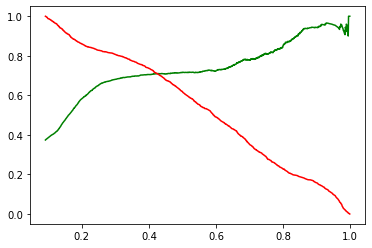

In [169]:
#Plotting Precision vs Recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [170]:
#We are going to keep cutoff as 0.40 based on the above curve
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.40 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.711105,1,1,1,1,1,1,1,1,1,0,0,1,71
1,0,0.093389,0,1,0,0,0,0,0,0,0,0,0,0,9
2,1,0.206210,0,1,1,1,0,0,0,0,0,0,0,0,21
3,0,0.169381,0,1,1,0,0,0,0,0,0,0,0,0,17
4,0,0.159008,0,1,1,0,0,0,0,0,0,0,0,0,16


In [171]:
# Checking the Accuracy
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2)

0.79

In [172]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2450,  553],
       [ 474, 1322]], dtype=int64)

In [173]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [174]:
# Precision = TP / TP + FP
round(TP / float(TP + FP),2)

0.71

In [175]:
#Recall = TP / TP + FN
round(TP / (TP + FN),2)

0.74

### Our Analysis on the Train dataset
- If we take 0.40 as a cutoff we got the following metrics
    - Accuracy - 0.79
    - Precision - 0.71
    - Recall - 0.74

### Test set Prediction

In [176]:
# Creating a new variable called 'y_test_pred' to store prediction of test set in the variable 
y_test_pred = res.predict(X_test_sm)

In [177]:
# Coverting y_test_pred and y_test to dataframe
y_pred_df = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

In [178]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [179]:
# Concatanating y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [180]:
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.678565
1,0,0.159557
2,0,0.185854
3,1,0.918566
4,0,0.201548


In [181]:
# Making prediction based on the cut off 0.40
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.40 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,1,0.678565,1
1,0,0.159557,0
2,0,0.185854,0
3,1,0.918566,1
4,0,0.201548,0
...,...,...,...
2052,1,0.906663,1
2053,0,0.220673,0
2054,0,0.383695,0
2055,0,0.157097,0


In [182]:
# Checking the overall accuracy
round(metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted),2)

0.8

In [183]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1064,  226],
       [ 181,  586]], dtype=int64)

In [184]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [185]:
# Precision = TP / TP + FP
round(TP / float(TP + FP),2)

0.72

In [186]:
#Recall = TP / TP + FN
round(TP / float(TP + FN),2)

0.76

### Our Analysis on the Test dataset
- If we take 0.40 as a cutoff we got the following metrics
    - Accuracy - 0.80
    - Precision - 0.72
    - Recall - 0.76

## Results
- The following are the top 3 variables that are positively correlated with the target variable Converted, which means when it increases there are more chances the lead may get converted:
    - Lead Origin_Lead Add Form
    - Total Time Spent on Website
    - Lead Source_Google
- The following are the top 3 variables that are negatively correlated with the target variable Converted, which means when it increases there are less chances the lead may get converted:
    - What is your current occupation_Other
    - What is your current occupation_Unemployed
    - What is your current occupation_Student
- The following are the overall top 3 variables in the model which contributes most towards the probability of a lead getting converted:
    - What is your current occupation_Other
    - What is your current occupation_Unemployed
    - What is your current occupation_Student
- Based on the accuracy, sensitivity and specificity curve we got the cut off of 0.32 and got the following values in the evaluation metrics:
    - Train Data Set
        - Accuracy - 0.76
        - Sensitivity - 0.62
        - Specificity - 0.85
        - False Postive Rate - 0.15
        - Positive predictive value - 0.72
        - Negative predictive value - 0.79
    - Test Data Set
        - Accuracy - 0.81
        - Sensitivity/Recall - 0.82
        - Specificity - 0.80
        - False Postive Rate - 0.20
        - Positive predictive value/Precision - 0.71
        - Negative predictive value - 0.88
        - Precision_score - 0.71
        - Recall_score - 0.82
     
- Based on the precision_recall_curve we got the cut off of 0.40 and got the following values in the evaluation metrics:
    - Train Data Set
        - Accuracy - 0.79
        - Precision - 0.71
        - Recall - 0.74
    - Test Data Set
        - Accuracy - 0.80
        - Precision - 0.72
        - Recall - 0.76